In [826]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import networkx as nx
#!pip install python-louvain
import community
from sklearn.preprocessing import StandardScaler
import json
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

### Loading the data

In [827]:
# Download names to make it more friendly
json_file_path_1 = '../data/all_coins_by_mc_1.json'
json_file_path_2 = '../data/all_coins_by_mc_2.json'

# Open the JSON file and load its contents
with open(json_file_path_1, 'r') as file:
    data = json.load(file)

with open(json_file_path_2, 'r') as file:
    data = data + json.load(file)
# Now, 'data' contains the contents of the JSON file as a Python object (dictionary, list, etc.)
print(data)

[{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin', 'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1696501400', 'current_price': 38766, 'market_cap': 757756869958, 'market_cap_rank': 1, 'fully_diluted_valuation': 813589986427, 'total_volume': 15536504879, 'high_24h': 38899, 'low_24h': 38247, 'price_change_24h': 161.83, 'price_change_percentage_24h': 0.4192, 'market_cap_change_24h': 1478655500, 'market_cap_change_percentage_24h': 0.19552, 'circulating_supply': 19558862, 'total_supply': 21000000, 'max_supply': 21000000, 'ath': 69045, 'ath_change_percentage': -43.8945, 'ath_date': '2021-11-10T14:24:11.849Z', 'atl': 67.81, 'atl_change_percentage': 57027.97702, 'atl_date': '2013-07-06T00:00:00.000Z', 'roi': None, 'last_updated': '2023-12-02T11:49:05.549Z', 'price_change_percentage_24h_in_currency': 0.41920133852781244}, {'id': 'ethereum', 'symbol': 'eth', 'name': 'Ethereum', 'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?1696501628', '

In [828]:
names_list = [stock["name"] for stock in data]
names_list

['Bitcoin',
 'Ethereum',
 'Tether',
 'BNB',
 'XRP',
 'Solana',
 'USDC',
 'Lido Staked Ether',
 'Cardano',
 'Dogecoin',
 'TRON',
 'Chainlink',
 'Toncoin',
 'Avalanche',
 'Polygon',
 'Polkadot',
 'Wrapped Bitcoin',
 'Dai',
 'Litecoin',
 'Shiba Inu',
 'Uniswap',
 'Bitcoin Cash',
 'LEO Token',
 'OKB',
 'Stellar',
 'Monero',
 'Kaspa',
 'TrueUSD',
 'Cosmos Hub',
 'Ethereum Classic',
 'Cronos',
 'Filecoin',
 'Internet Computer',
 'Lido DAO',
 'THORChain',
 'Hedera',
 'Aptos',
 'NEAR Protocol',
 'Immutable',
 'Mantle',
 'BUSD',
 'Bittensor',
 'VeChain',
 'Optimism',
 'Injective',
 'Aave',
 'Quant',
 'Maker',
 'The Graph',
 'Arbitrum',
 'Render',
 'Rocket Pool ETH',
 'Celestia',
 'MultiversX',
 'Synthetix Network',
 'Algorand',
 'Stacks',
 'Theta Network',
 'Flow',
 'First Digital USD',
 'Bitcoin SV',
 'Fantom',
 'The Sandbox',
 'Axie Infinity',
 'IOTA',
 'Decentraland',
 'WEMIX',
 'Terra Luna Classic',
 'NEO',
 'WhiteBIT Coin',
 'EOS',
 'KuCoin',
 'Kava',
 'Tezos',
 'Mina Protocol',
 'GALA',
 

In [829]:
data = pd.read_csv("../data/prices.csv", parse_dates=['date'])
data.rename(columns={data.columns[0]: 'date'}, inplace=True)
data.set_index("date", inplace=True)

In [830]:
data.columns = names_list
data

,Bitcoin,Ethereum,Tether,BNB,XRP,Solana,USDC,Lido Staked Ether,Cardano,Dogecoin,...,Tectum,Fidu,Cornucopias,DexTools,COMBO,Ankr Staked ETH,Bazaars,Aurora,Coinweb,UwU Lend
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 23:00:00,7192.034849,130.236507,0.999814,13.666737,0.192640,NaN,1.001706,NaN,0.033452,0.002028,...,NaN,NaN,NaN,NaN,0.000575,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00,7194.407631,130.542567,0.999831,13.680347,0.192556,NaN,1.002543,NaN,0.033332,0.002027,...,NaN,NaN,NaN,NaN,0.000569,NaN,NaN,NaN,NaN,NaN
2020-01-02 01:00:00,7201.231756,130.441856,0.999295,13.704961,0.192184,NaN,1.003172,NaN,0.033380,0.002031,...,NaN,NaN,NaN,NaN,0.000568,NaN,NaN,NaN,NaN,NaN
2020-01-02 02:00:00,7172.868535,129.893532,0.997187,13.619371,0.192112,NaN,1.001664,NaN,0.033322,0.002018,...,NaN,NaN,NaN,NaN,0.000583,NaN,NaN,NaN,NaN,NaN
2020-01-02 03:00:00,7158.036110,129.566225,0.999005,13.565571,0.191303,NaN,1.002306,NaN,0.033136,0.002022,...,NaN,NaN,NaN,NaN,0.000580,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16 18:00:00,24860.079103,1663.796088,1.006385,331.220203,0.366382,19.540765,1.005124,1657.547915,0.325908,0.070863,...,NaN,1.002038,0.033543,0.282995,1.457285,1808.776580,0.995846,0.208070,0.015042,8.156536
2023-03-16 19:00:00,24947.832388,1666.721166,1.006512,332.009557,0.367803,19.689141,1.006831,1660.360045,0.325725,0.071001,...,NaN,1.004539,0.033973,0.284396,1.448915,1811.793388,1.001170,0.206429,0.015063,8.161331
2023-03-16 20:00:00,25059.750597,1685.138105,1.005599,331.210287,0.368256,19.863669,1.002247,1676.995045,0.327618,0.071411,...,NaN,1.001609,0.033969,0.283888,1.466088,1829.774892,1.005815,0.209833,0.015063,8.241946


In [831]:
stables_list = ['Tether', 'USDC', 'Dai', 'TrueUSD', 'BUSD', 'USDD', 'Frax',
 'Tether Gold', 'PAX Gold', 'Pax Dollar', 'Flare', 'Liquity USD',
 'Alchemix USD', 'cDAI', 'Gemini Dollar', 'cUSDC', 'STASIS EURO',
 'Short-term T-Bill Token', 'Hifi Finance', 'EURC', 'Fidu', 'Bazaars']

data.T.index[(((data.mean(axis=0) / data.std(axis=0)) > 10))]

Index(['Tether', 'USDC', 'Dai', 'TrueUSD', 'BUSD', 'USDD', 'Frax',
       'Tether Gold', 'PAX Gold', 'Pax Dollar', 'Flare', 'Liquity USD',
       'Alchemix USD', 'cDAI', 'Gemini Dollar', 'cUSDC', 'STASIS EURO',
       'Short-term T-Bill Token', 'Hifi Finance', 'EURC', 'Fidu', 'Bazaars'],
      dtype='object')

In [832]:
#data.to_csv("../data/prices_clean.csv")

In [833]:
#scaler = StandardScaler()

# Normalize each column in the dataframe
#data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)


In [834]:
data.drop('Bone ShibaSwap', axis=1, inplace=True)
#data.drop(stables_list, axis=1, inplace=True)
daily_prices = data.groupby(data.index.date).first()
#daily_returns_pct = daily_prices.pct_change()
daily_log_returns = np.log(daily_returns_pct + 1)

In [835]:
hourly_returns_pct = data.pct_change()
#hourly_log_returns = hourly_returns_pct
hourly_log_returns = np.log(hourly_returns_pct + 1)
hourly_log_returns

,Bitcoin,Ethereum,Tether,BNB,XRP,Solana,USDC,Lido Staked Ether,Cardano,Dogecoin,...,Tectum,Fidu,Cornucopias,DexTools,COMBO,Ankr Staked ETH,Bazaars,Aurora,Coinweb,UwU Lend
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02 00:00:00,0.000330,0.002347,0.000017,0.000995,-0.000438,NaN,0.000836,NaN,-0.003580,-0.000504,...,NaN,NaN,NaN,NaN,-0.010936,NaN,NaN,NaN,NaN,NaN
2020-01-02 01:00:00,0.000948,-0.000772,-0.000537,0.001798,-0.001930,NaN,0.000627,NaN,0.001426,0.001631,...,NaN,NaN,NaN,NaN,-0.001216,NaN,NaN,NaN,NaN,NaN
2020-01-02 02:00:00,-0.003946,-0.004212,-0.002111,-0.006265,-0.000376,NaN,-0.001504,NaN,-0.001732,-0.006427,...,NaN,NaN,NaN,NaN,0.026720,NaN,NaN,NaN,NaN,NaN
2020-01-02 03:00:00,-0.002070,-0.002523,0.001821,-0.003958,-0.004222,NaN,0.000641,NaN,-0.005601,0.001893,...,NaN,NaN,NaN,NaN,-0.005938,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16 18:00:00,-0.003727,-0.002267,-0.000232,0.003893,-0.000675,-0.004774,0.000286,-0.003287,-0.008404,-0.006541,...,NaN,0.002319,-0.001305,0.005613,-0.007430,-0.000187,-0.005992,-0.009286,-0.000512,-0.002000
2023-03-16 19:00:00,0.003524,0.001757,0.000127,0.002380,0.003869,0.007564,0.001697,0.001695,-0.000562,0.001951,...,NaN,0.002493,0.012728,0.004940,-0.005760,0.001666,0.005332,-0.007918,0.001374,0.000588
2023-03-16 20:00:00,0.004476,0.010989,-0.000908,-0.002410,0.001231,0.008825,-0.004563,0.009969,0.005796,0.005752,...,NaN,-0.002921,-0.000115,-0.001788,0.011783,0.009876,0.004629,0.016356,0.000019,0.009829


In [836]:
scaler = StandardScaler()

# Normalize each column in the dataframe
daily_log_returns = pd.DataFrame(scaler.fit_transform(daily_log_returns), columns=daily_log_returns.columns, index=daily_log_returns.index)
hourly_log_returns = pd.DataFrame(scaler.fit_transform(hourly_log_returns), columns=hourly_log_returns.columns, index=hourly_log_returns.index)

/Users/robinjaccard/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning:

invalid value encountered in divide

/Users/robinjaccard/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning:

invalid value encountered in divide

/Users/robinjaccard/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning:

invalid value encountered in divide



In [837]:
# Just take bull run of 2021
#returns = returns[:18000].copy()

In [838]:
hourly_log_returns.dropna(axis=1, how='all', inplace=True)
hourly_log_returns.dropna(axis=0, how='all', inplace=True)
hourly_log_returns.dropna(axis=1, thresh=15000, inplace=True)

daily_log_returns.dropna(axis=1, how='all', inplace=True)
daily_log_returns.dropna(axis=0, how='all', inplace=True)
daily_log_returns.dropna(axis=1, thresh=daily_log_returns.shape[0] * 3/4, inplace=True)
#data.drop('short-term-t-bill-token', axis=1, inplace=True)
#data.drop('mainframe', axis=1, inplace=True)
#returns.drop('Kujira', axis=1, inplace=True)

In [839]:
daily_log_returns.corr().isna().sum()

Bitcoin       0
Ethereum      0
Tether        0
BNB           0
XRP           0
             ..
LCX           0
Sologenic     0
Firmachain    0
DexTools      0
COMBO         0
Length: 240, dtype: int64

In [840]:
hourly_log_returns.corr().isna().sum()

Bitcoin            0
Ethereum           0
Tether             0
BNB                0
XRP                0
                  ..
Sologenic          0
Firmachain         0
DexTools           0
COMBO              0
Ankr Staked ETH    0
Length: 268, dtype: int64

In [841]:
def compute_C_minus_C0(lambdas, v, lambda_plus, removeMarketMode=False):
    N=len(lambdas)
    C_clean=np.zeros((N, N))

    order = np.argsort(lambdas)
    lambdas,v = lambdas[order],v[:,order]

    v_m=np.matrix(v)

    # note that the eivenvalues are sorted
    for i in range(1*removeMarketMode,N):
        if lambdas[i]>lambda_plus:
            C_clean=C_clean+lambdas[i] * np.dot(v_m[:,i],v_m[:,i].T)
    return C_clean


def LouvainCorrelationClustering(R):   # R is a matrix of return
    N=R.shape[1]
    T=R.shape[0]

    q=N*1./T
    lambda_plus=(1.+np.sqrt(q))**2
    print(1)
    C=R.corr()
    lambdas, v = LA.eigh(C)
    print(2)
    C_s=compute_C_minus_C0(lambdas,v,lambda_plus)
    #print(C_s)
    mygraph= nx.from_numpy_array(np.abs(C_s))
    print(3)
    partition = community.community_louvain.best_partition(mygraph, resolution=1.05, random_state=3)
    print(4)
    #DF=pd.DataFrame.from_dict(partition, orient="index")
    return partition, mygraph

## Partition by crypto

In [842]:
df_to_use = hourly_log_returns.iloc[:, :]

In [844]:
partition, mygraph = LouvainCorrelationClustering(df_to_use)

1
2
3
4


In [845]:
all_names = list(df_to_use.columns)

In [846]:
dict_clusters = {}
for i,name in enumerate(all_names):
    dict_clusters[name] = partition[i]

In [847]:
dict_clusters

{'Bitcoin': 0,
 'Ethereum': 0,
 'Tether': 5,
 'BNB': 2,
 'XRP': 2,
 'Solana': 6,
 'USDC': 5,
 'Lido Staked Ether': 0,
 'Cardano': 2,
 'Dogecoin': 2,
 'TRON': 2,
 'Chainlink': 2,
 'Avalanche': 6,
 'Polygon': 4,
 'Polkadot': 6,
 'Wrapped Bitcoin': 0,
 'Dai': 5,
 'Litecoin': 2,
 'Shiba Inu': 6,
 'Uniswap': 6,
 'Bitcoin Cash': 2,
 'LEO Token': 5,
 'OKB': 5,
 'Stellar': 2,
 'Monero': 2,
 'TrueUSD': 5,
 'Cosmos Hub': 2,
 'Ethereum Classic': 4,
 'Cronos': 0,
 'Filecoin': 6,
 'Lido DAO': 0,
 'THORChain': 6,
 'Hedera': 2,
 'NEAR Protocol': 6,
 'BUSD': 5,
 'VeChain': 2,
 'Injective': 6,
 'Aave': 6,
 'Quant': 0,
 'Maker': 4,
 'The Graph': 6,
 'Render': 6,
 'MultiversX': 6,
 'Synthetix Network': 4,
 'Algorand': 2,
 'Stacks': 8,
 'Theta Network': 7,
 'Bitcoin SV': 5,
 'Fantom': 4,
 'The Sandbox': 7,
 'Axie Infinity': 6,
 'IOTA': 4,
 'Decentraland': 7,
 'WEMIX': 8,
 'Terra Luna Classic': 1,
 'NEO': 2,
 'EOS': 2,
 'KuCoin': 5,
 'Kava': 3,
 'Tezos': 2,
 'GALA': 7,
 'Bitget Token': 0,
 'XDC Network': 0

In [848]:
grouped_cryptos = {}

for crypto, number in dict_clusters.items():
    if number not in grouped_cryptos:
        grouped_cryptos[number] = []
    grouped_cryptos[number].append(crypto)

# Convert the dictionary values to a list for easier usage
result_lists = list(grouped_cryptos.values())

# Print or use the result_lists as needed
print(result_lists)

[['Bitcoin', 'Ethereum', 'Lido Staked Ether', 'Wrapped Bitcoin', 'Cronos', 'Lido DAO', 'Quant', 'Bitget Token', 'XDC Network', 'Tokenize Xchange', 'Rocket Pool', 'Gnosis', 'cETH', 'cWBTC', 'NEXO', 'SingularityNET', 'Huobi BTC', 'Nexus Mutual', 'Decred', 'OriginTrail', 'DeFiChain', 'FINSCHIA', 'SwissBorg', 'Flux', 'Telcoin', 'Kadena', 'Amp', 'inSure DeFi', 'Blox', 'RSK Infrastructure Framework', 'LUKSO [OLD]', 'Verus Coin', 'Celsius Network', 'Bancor Network', 'Constellation', 'Function X', 'XYO Network', 'MaidSafeCoin', 'Ultra', 'ChainX', 'e-Radix', 'Creditcoin', 'tBTC', 'Sologenic', 'Ankr Staked ETH'], ['Tether', 'USDC', 'Dai', 'LEO Token', 'OKB', 'TrueUSD', 'BUSD', 'Bitcoin SV', 'KuCoin', 'Frax', 'Gate', 'Tether Gold', 'PAX Gold', 'Huobi', 'Pax Dollar', 'MX', 'Beldex', 'cDAI', 'Gemini Dollar', 'cUSDC', 'BTSE Token', 'STASIS EURO', 'Nervos Network', 'VeThor', 'CoinEx', 'HXRO', 'Cortex', 'FLEX Coin', 'WINkLink', 'Tokenlon', 'Hermez Network', 'WazirX'], ['BNB', 'XRP', 'Cardano', 'Dogeco

In [849]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Loop through each community
for group in result_lists:
    # Subset the data for the current group
    subset_data = df_to_use[group]

    imputer = SimpleImputer(strategy='mean')
    subset_data_imputed = pd.DataFrame(imputer.fit_transform(subset_data), columns=subset_data.columns, index=subset_data.index)
    
    # Standardize/Normalize the data
    scaler = StandardScaler()
    subset_data_standardized = scaler.fit_transform(subset_data_imputed)

    # Apply PCA
    pca = PCA()
    principal_components = pca.fit_transform(subset_data_standardized)

    # Identify the leading coin (biggest contributor in the first principal component)
    leading_coin_index = np.argmax(np.abs(pca.components_[0]))
    leading_coin = subset_data.columns[leading_coin_index]

    # Print
    print(f"Community Group: {group}, Leading Coin (PCA): {leading_coin}\n")

Community Group: ['Bitcoin', 'Ethereum', 'Lido Staked Ether', 'Wrapped Bitcoin', 'Cronos', 'Lido DAO', 'Quant', 'Bitget Token', 'XDC Network', 'Tokenize Xchange', 'Rocket Pool', 'Gnosis', 'cETH', 'cWBTC', 'NEXO', 'SingularityNET', 'Huobi BTC', 'Nexus Mutual', 'Decred', 'OriginTrail', 'DeFiChain', 'FINSCHIA', 'SwissBorg', 'Flux', 'Telcoin', 'Kadena', 'Amp', 'inSure DeFi', 'Blox', 'RSK Infrastructure Framework', 'LUKSO [OLD]', 'Verus Coin', 'Celsius Network', 'Bancor Network', 'Constellation', 'Function X', 'XYO Network', 'MaidSafeCoin', 'Ultra', 'ChainX', 'e-Radix', 'Creditcoin', 'tBTC', 'Sologenic', 'Ankr Staked ETH'], Leading Coin (PCA): Ethereum
Community Group: ['Tether', 'USDC', 'Dai', 'LEO Token', 'OKB', 'TrueUSD', 'BUSD', 'Bitcoin SV', 'KuCoin', 'Frax', 'Gate', 'Tether Gold', 'PAX Gold', 'Huobi', 'Pax Dollar', 'MX', 'Beldex', 'cDAI', 'Gemini Dollar', 'cUSDC', 'BTSE Token', 'STASIS EURO', 'Nervos Network', 'VeThor', 'CoinEx', 'HXRO', 'Cortex', 'FLEX Coin', 'WINkLink', 'Tokenlon', 

## Partition by time

In [851]:
time_daily = np.log(daily_returns_pct + 1)
df_to_use_time = time_daily.iloc[450:750,:].T.copy()
#df_to_use_time.mean(axis=0)

In [852]:
scaler = StandardScaler()

# Normalize each column in the dataframe
df_to_use_time = pd.DataFrame(scaler.fit_transform(df_to_use_time), columns=df_to_use_time.columns, index=df_to_use_time.index)

In [853]:
df_to_use_time.dropna(axis=1, how='all', inplace=True)
df_to_use_time.dropna(axis=0, how='all', inplace=True)
df_to_use_time.dropna(axis=1, thresh=df_to_use_time.shape[0] * 3/4, inplace=True)

In [854]:
df_to_use_time = df_to_use_time.copy()

In [855]:
partition_time, mygraph = LouvainCorrelationClustering(df_to_use_time)

1
2
3
4


In [856]:
all_times = list(df_to_use_time.columns)

In [857]:
dict_clusters_time = {} 
for i,name in enumerate(all_times):
    dict_clusters_time[name] = partition_time[i]

In [858]:
dict_clusters_time

{datetime.date(2021, 4, 2): 0,
 datetime.date(2021, 4, 3): 0,
 datetime.date(2021, 4, 4): 0,
 datetime.date(2021, 4, 5): 0,
 datetime.date(2021, 4, 6): 0,
 datetime.date(2021, 4, 7): 0,
 datetime.date(2021, 4, 8): 0,
 datetime.date(2021, 4, 9): 0,
 datetime.date(2021, 4, 10): 1,
 datetime.date(2021, 4, 11): 0,
 datetime.date(2021, 4, 12): 1,
 datetime.date(2021, 4, 13): 3,
 datetime.date(2021, 4, 14): 0,
 datetime.date(2021, 4, 15): 0,
 datetime.date(2021, 4, 16): 1,
 datetime.date(2021, 4, 17): 1,
 datetime.date(2021, 4, 18): 1,
 datetime.date(2021, 4, 19): 0,
 datetime.date(2021, 4, 20): 1,
 datetime.date(2021, 4, 21): 1,
 datetime.date(2021, 4, 22): 1,
 datetime.date(2021, 4, 23): 0,
 datetime.date(2021, 4, 24): 3,
 datetime.date(2021, 4, 25): 4,
 datetime.date(2021, 4, 26): 3,
 datetime.date(2021, 4, 27): 0,
 datetime.date(2021, 4, 28): 5,
 datetime.date(2021, 4, 29): 1,
 datetime.date(2021, 4, 30): 8,
 datetime.date(2021, 5, 1): 1,
 datetime.date(2021, 5, 2): 4,
 datetime.date(202

In [859]:
grouped_time = {}

for time, number in dict_clusters_time.items():
    if number not in grouped_time:
        grouped_time[number] = []
    grouped_time[number].append(time)

# Convert the dictionary values to a list for easier usage
result_time_lists = list(grouped_time.values())

# Print or use the result_lists as needed
for state in result_time_lists:
    print(len(state))

43
27
40
36
56
19
19
26
27


In [860]:
df_to_use_time.index

Index(['Bitcoin', 'Ethereum', 'Tether', 'BNB', 'XRP', 'Solana', 'USDC',
       'Lido Staked Ether', 'Cardano', 'Dogecoin',
       ...
       'Router Protocol', 'Bficoin', 'Boba Network', 'Firmachain',
       'Cornucopias', 'DexTools', 'COMBO', 'Ankr Staked ETH', 'Aurora',
       'Coinweb'],
      dtype='object', length=386)

In [861]:
crypto_list = list(df_to_use_time.index)
for group in result_time_lists:
    # Subset the data for the current group
    subset_data = daily_returns_pct.T.loc[crypto_list, group]
    print(subset_data.iloc[:10,:].mean(axis=1))
    #subset_data.plot()

Bitcoin             -0.004455
Ethereum             0.002815
Tether              -0.000174
BNB                 -0.000243
XRP                  0.020751
Solana               0.008555
USDC                -0.000202
Lido Staked Ether    0.000576
Cardano             -0.001666
Dogecoin             0.007573
dtype: float64
Bitcoin             -0.003619
Ethereum             0.004940
Tether               0.000629
BNB                  0.003323
XRP                 -0.023453
Solana              -0.015654
USDC                 0.000446
Lido Staked Ether    0.002077
Cardano             -0.015415
Dogecoin             0.067887
dtype: float64
Bitcoin              0.009513
Ethereum             0.014704
Tether               0.000425
BNB                  0.010991
XRP                  0.018108
Solana               0.020102
USDC                -0.000112
Lido Staked Ether    0.012821
Cardano              0.012017
Dogecoin             0.002237
dtype: float64
Bitcoin              0.004014
Ethereum             0.00

In [862]:
State_1 = 0
State_2 = 1

merge = pd.DataFrame()
merge['state1'] = daily_returns_pct.T.loc[crypto_list, result_time_lists[State_1]].mean(axis=1)
merge['state2'] = daily_returns_pct.T.loc[crypto_list, result_time_lists[State_2]].mean(axis=1)
merge.reset_index(inplace=True)
merge['size'] = 100 / (merge.index + 2)
merge.dropna(axis=0, how='any', inplace=True)

df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(merge, x="state1", y="state2", hover_data=['index'])

#color_sequence = sns.color_palette("husl", len(result_lists)).as_hex()
#mapping = {crypto: color_sequence[dict_clusters[crypto]] for crypto in crypto_list}
#colors = [mapping[c] for c in list(merge['index'])]

#fig.update_traces(marker=dict(color=colors))
fig.show()

In [863]:
all_times_list = list(dict_clusters_time.values())

transitions_count = {}

for i in range(len(all_times_list) - 1):
    current_state = all_times_list[i]
    next_state = all_times_list[i + 1]
    transition = (current_state, next_state)

    # Update the count in the dictionary
    transitions_count[transition] = transitions_count.get(transition, 0) + 1

In [864]:
# Convert the transitions_count dictionary to a DataFrame
df_transitions = pd.DataFrame(list(transitions_count.items()), columns=['Transition', 'Count'])

# Extract current and next states into separate columns
df_transitions[['Current State', 'Next State']] = pd.DataFrame(df_transitions['Transition'].tolist(), index=df_transitions.index)

# Drop the original 'Transition' column
df_transitions = df_transitions.drop(columns=['Transition'])

# Create a pivot table to get the counts in matrix form
transition_matrix = df_transitions.pivot_table(index='Current State', columns='Next State', values='Count', fill_value=0)

# Normalize the counts to get probabilities
transition_matrix_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

# Display the transition matrix and probabilities
print("Transition Matrix:")
print(transition_matrix)
print("\nTransition Probabilities:")
print(transition_matrix_prob)

Transition Matrix:
Next State      0  1  2   3   4   5  6  7  8
Current State                               
0              11  5  3   3   6  10  3  2  0
1               5  8  1   3   3   2  0  3  2
2               2  2  4   1   0   7  2  1  0
3               6  1  0  15   5   3  7  1  2
4               2  2  1   3  13   5  2  4  4
5               7  3  7   8   3  15  3  5  5
6               2  1  1   5   2   5  7  1  2
7               2  2  2   1   4   5  0  8  2
8               5  3  0   1   0   4  2  2  2

Transition Probabilities:
Next State            0         1         2         3         4         5  \
Current State                                                               
0              0.255814  0.116279  0.069767  0.069767  0.139535  0.232558   
1              0.185185  0.296296  0.037037  0.111111  0.111111  0.074074   
2              0.105263  0.105263  0.210526  0.052632  0.000000  0.368421   
3              0.150000  0.025000  0.000000  0.375000  0.125000  0.075000 

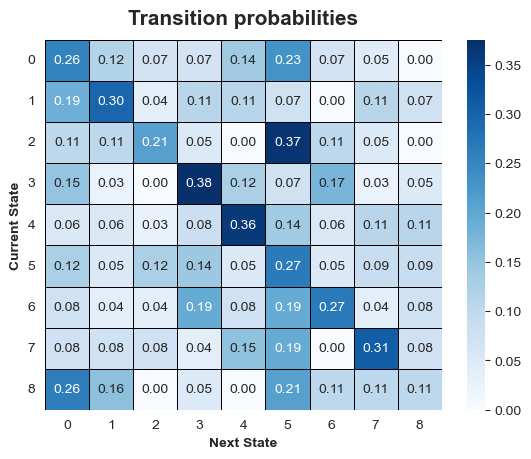

In [865]:
transition_matrix = transition_matrix_prob

#heatmap_figsize=(36,12)
ticks = np.arange(0.5, len(transition_matrix), 1)


communities_name = range(len(transition_matrix))

# Heatmap of the ratio of votes across communities
#plt.figure(figsize=heatmap_figsize)
sns.heatmap(transition_matrix, cmap="Blues", annot=True, fmt=".2f", linewidths=.5, linecolor="black")
plt.title("Transition probabilities",size=15, fontweight='bold', y=1.02)
plt.xlabel("Next State", size=10, fontweight='bold')
plt.ylabel("Current State", size=10, fontweight='bold')
plt.xticks(ticks=ticks,labels=communities_name)
plt.yticks(ticks=ticks, labels=communities_name, rotation='horizontal')
plt.show()

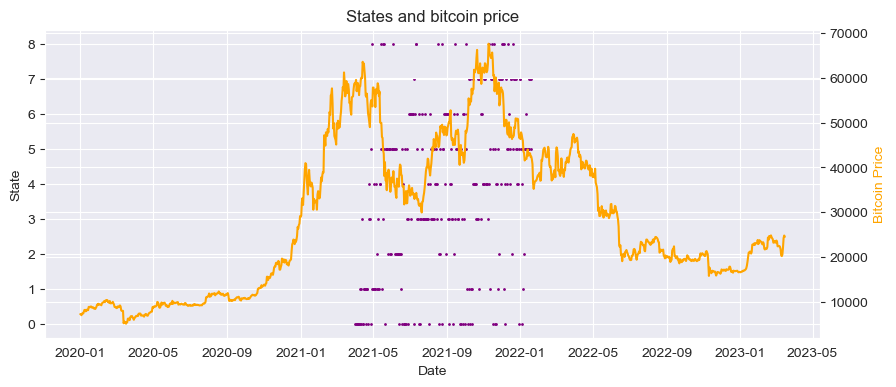

In [866]:
df = pd.DataFrame(list(dict_clusters_time.items()), columns=['Date', 'Value'])
df
df_btc = daily_prices.loc[:, ['Bitcoin']].reset_index()
# Create figure and plot space
fig, ax1 = plt.subplots(figsize=(10, 4))

# Add x-axis and y-axis
ax1.scatter(df['Date'],
           df['Value'],
           color='purple',
           s=1)

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="State",
       title="States and bitcoin price")

ax2 = ax1.twinx()
ax2.plot(df_btc['index'], df_btc['Bitcoin'], color='orange', label='Bitcoin Price')
ax2.set_ylabel("Bitcoin Price", color='orange')

plt.show()